# Unsupervised Learning Challange

Here I will use the dataset from my supervised learning capstone. This dataset is aggregated from the Indego bike share data. The data set contains a target variable for bike activity within the last 30 days. These data are already cleaned.

In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

from sklearn.preprocessing import StandardScaler, normalize
from sklearn import metrics

In [3]:
def plot_hist_boxplot(df):
    '''
    Accepts only numerical columns;
    use a maks.
    '''
    dim = df.shape[1]
    plt.figure(figsize=(20, dim*5))
    
    # iterate through the columns
    for i, column in enumerate(df.columns):
        
        # plot a histogram
        plt.subplot(dim, 2, (i+1)*2-1)
        plt.hist(df[column])
        plt.ylabel(column, size='xx-large')
        
        # plot a boxplot
        plt.subplot(dim, 2, (i+1)*2)
        plt.boxplot(df[column], whis=[2.5, 97.5]) # boxplot will show outliers beyond the inner 90th percentile
    plt.show()

In [4]:
# Load the dataset

df = pd.read_csv(r'data/indego/bikewise.csv')

In [4]:
df.head()

,bike_id,total_time,mean_time,trips,total_distance,mean_distance,most_recent_trip,first_trip,round_trip_rate,trips_from_3000,trips_to_3000,age,use_rate,avg_speed,electric,inactive
0,2472.0,51496,19.905682,2587,2906.614566,1.123546,2019-08-22 16:41:00,2015-06-29 08:36:00,0.072284,0.0,0.0,2182085,2.359945,3.386610,0,1.0
1,2473.0,54273,20.628278,2631,3069.109171,1.166518,2019-08-29 15:53:00,2015-04-27 15:24:00,0.091600,1.0,25.0,2282429,2.377861,3.392968,0,1.0
2,2474.0,35313,18.174472,1943,2314.839799,1.191374,2019-05-08 07:40:00,2015-09-16 12:43:00,0.081832,0.0,0.0,1914897,1.844120,3.933123,0,1.0
3,2475.0,46506,21.313474,2182,2674.234933,1.225589,2019-05-02 19:51:00,2015-08-04 10:35:00,0.095784,1.0,11.0,1969036,2.361866,3.450181,0,1.0
4,2476.0,58911,21.175773,2782,3598.179104,1.293379,2020-06-21 11:36:00,2015-05-09 18:03:00,0.088785,0.0,0.0,2692413,2.188037,3.664693,0,0.0


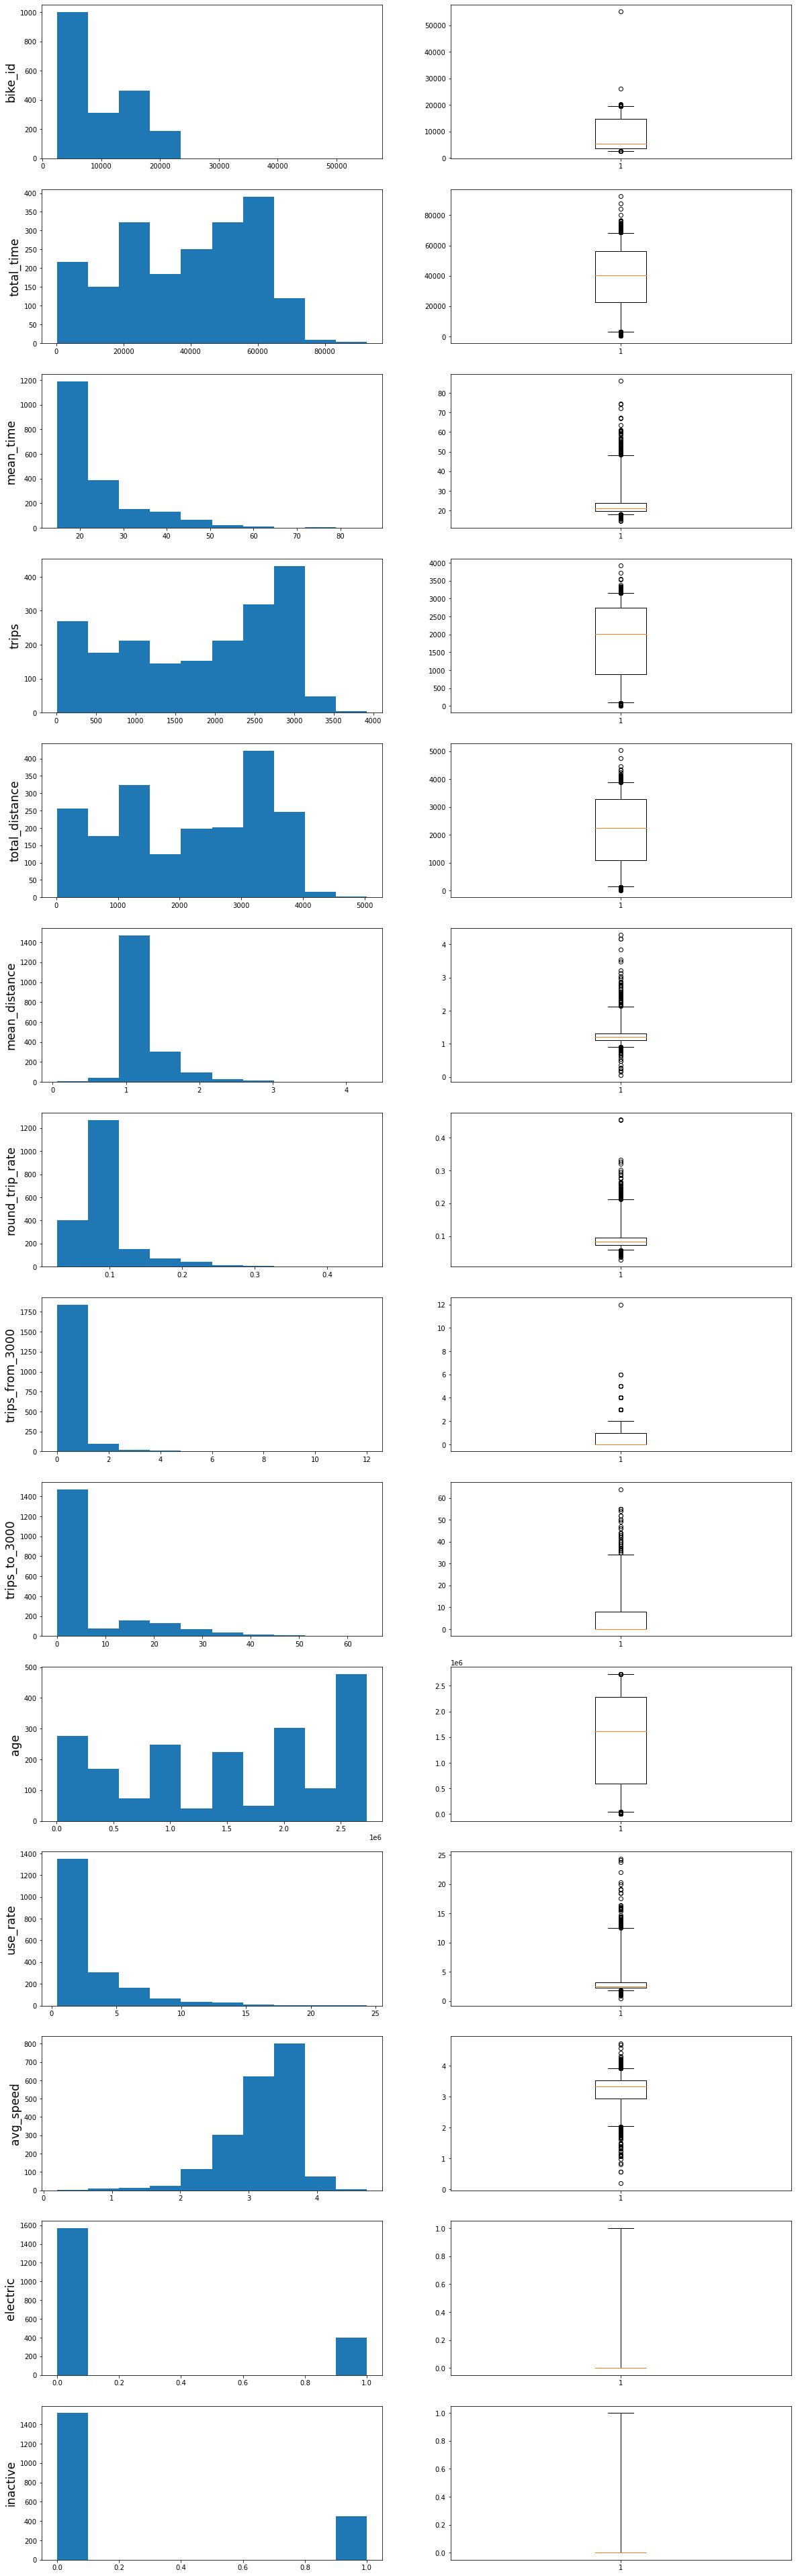

In [64]:
plot_hist_boxplot(df.select_dtypes(include='number'))

### Dimension Reduction and Visualization

In [49]:
y = df['electric']

In [5]:
X = df.select_dtypes(include='number').drop('bike_id', axis=1)

scaler = StandardScaler()

X = scaler.fit_transform(X)

In [6]:
# We just want the first two principal components
pca = PCA(n_components=2)

# We get the components by 
# calling fit_transform method with our data
pca_components = pca.fit_transform(X)

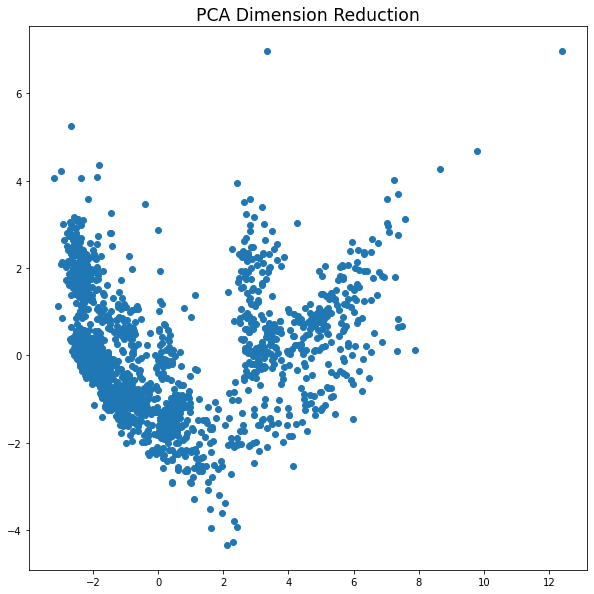

In [23]:
# First look at the 2D representation without coloring values
plt.figure(figsize=(10,10))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA Dimension Reduction', size='xx-large')
plt.show()

Initially I can see that there may be two clusters. They are not strongly defined here but there is a clear separation between at least two segments. 

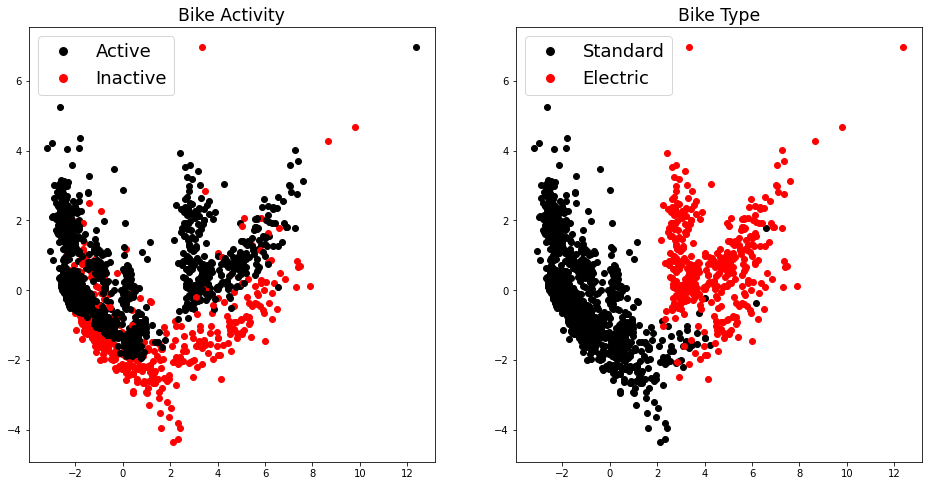

In [22]:
# Draw the legend for bike activity
legend_elements = [mlines.Line2D([0], [0], marker='o', color='w', label='Active',
                          markerfacecolor='black', markersize=10)
                   ,mlines.Line2D([0], [0], marker='o', color='w', label='Inactive',
                          markerfacecolor='red', markersize=10)]

# Plot the PCA components colored by bike activity
y = df['inactive']
colors = ['black', 'red']
plt.figure(figsize=(16,8))
ax1 = plt.subplot(1,2,1)
plt.title('Bike Activity', size='xx-large')
for i in range(pca_components.shape[0]):
    ax1.scatter(pca_components[i, 0], pca_components[i, 1], color=colors[int(y[i])])
plt.legend(handles=legend_elements, fontsize=18)


# Draw the legend for bike type
legend_elements = [mlines.Line2D([0], [0], marker='o', color='w', label='Standard',
                          markerfacecolor='black', markersize=10)
                   ,mlines.Line2D([0], [0], marker='o', color='w', label='Electric',
                          markerfacecolor='red', markersize=10)]


# Plot the PCA components colored by bike type
y = df['electric']
ax2 = plt.subplot(1,2,2)
plt.title('Bike Type', size='xx-large')
for i in range(pca_components.shape[0]):
    ax2.scatter(pca_components[i, 0], pca_components[i, 1], color=colors[int(y[i])])
plt.legend(handles=legend_elements, fontsize=18)

plt.show()

Visually we can see that bike type matches the clusters fairly well while activity does not.

What about UMAP visualizations?

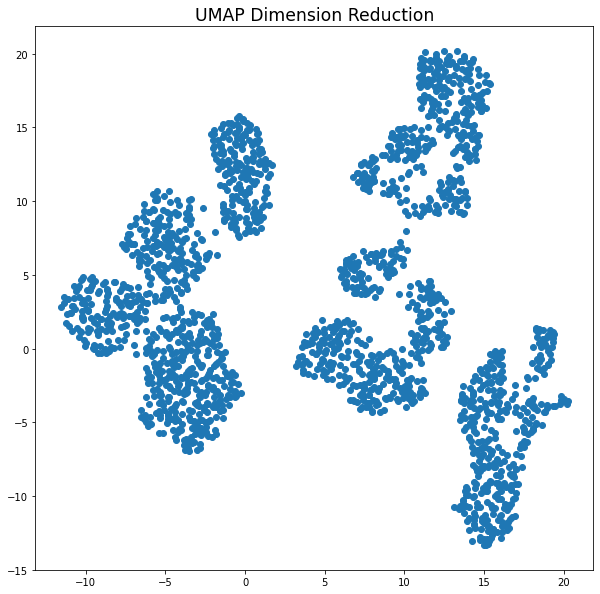

In [40]:
# Begin with a 
umap_results = umap.UMAP(n_neighbors=15,
                      min_dist=1,
                      metric='euclidean').fit_transform(X)


plt.figure(figsize=(10,10))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.title('UMAP Dimension Reduction', size='xx-large')
plt.show()

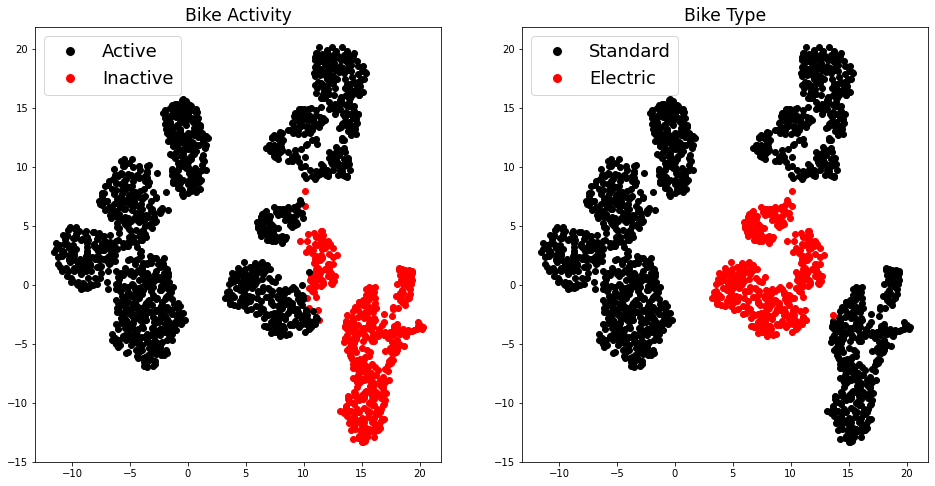

In [41]:
# Draw the legend for bike activity
legend_elements = [mlines.Line2D([0], [0], marker='o', color='w', label='Active',
                          markerfacecolor='black', markersize=10)
                   ,mlines.Line2D([0], [0], marker='o', color='w', label='Inactive',
                          markerfacecolor='red', markersize=10)]

# Plot the UMAP components colored by bike activity
y = df['inactive']
colors = ['black', 'red']
plt.figure(figsize=(16,8))
ax1 = plt.subplot(1,2,1)
plt.title('Bike Activity', size='xx-large')
for i in range(umap_results.shape[0]):
    ax1.scatter(umap_results[i, 0], umap_results[i, 1], color=colors[int(y[i])])
plt.legend(handles=legend_elements, fontsize=18)


# Draw the legend for bike type
legend_elements = [mlines.Line2D([0], [0], marker='o', color='w', label='Standard',
                          markerfacecolor='black', markersize=10)
                   ,mlines.Line2D([0], [0], marker='o', color='w', label='Electric',
                          markerfacecolor='red', markersize=10)]


# Plot the PCA components colored by bike type
y = df['electric']
ax2 = plt.subplot(1,2,2)
plt.title('Bike Type', size='xx-large')
for i in range(umap_results.shape[0]):
    ax2.scatter(umap_results[i, 0], umap_results[i, 1], color=colors[int(y[i])])
plt.legend(handles=legend_elements, fontsize=18)

plt.show()

These clusters pretty closely match some of the classes we already know. Given UMAP's tendency to preserve global differences this is not surprising. This leaves the question though, what groups are the other clusters? 

### K Means

Text(0, 0.5, 'Inertia')

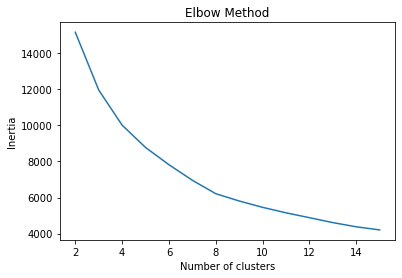

In [33]:


#Elbow Method
seed = 0
elbow = dict()
for k in range(2,16):
    estimator = KMeans(n_clusters = k,random_state=seed)
    res = estimator.fit_predict(X)
    inertia = estimator.inertia_
    elbow[k] = inertia
    
elbow_df = pd.Series(elbow)
ax = elbow_df.plot(title = 'Elbow Method')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Inertia')
#plt.plot(3,elbow_df[3],'ro')

There is not a clearly distinguishable number of clusters using the elbow method

In [39]:
estimator = KMeans(n_clusters = 3 ,random_state=seed)
res = estimator.fit_predict(X)

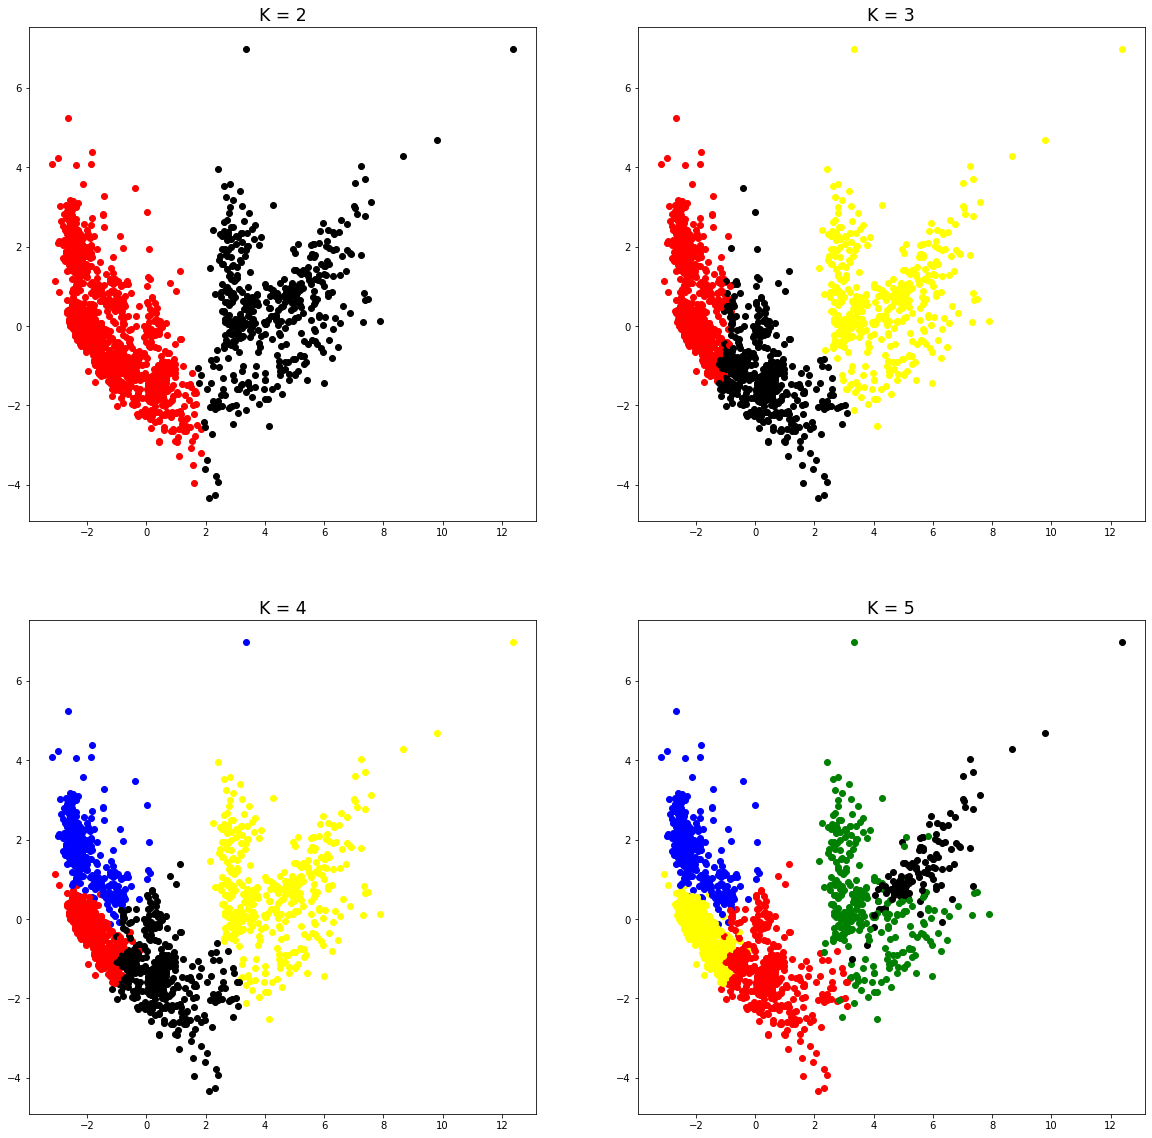

In [44]:
# Define a list of colors to use
colors = ['black', 'red', 'yellow', 'blue', 'green']

# Create a plot for each value of K
plt.figure(figsize=(20,20))
for k in [2,3,4,5]:
    estimator = KMeans(n_clusters = k ,random_state=seed)
    res = estimator.fit_predict(X)
    
       
    plt.subplot(2,2,k-1)
    plt.title('K = {}'.format(k), size='xx-large')
    for i in range(pca_components.shape[0]):
        plt.scatter(pca_components[i, 0], pca_components[i, 1], color=colors[int(res[i])])

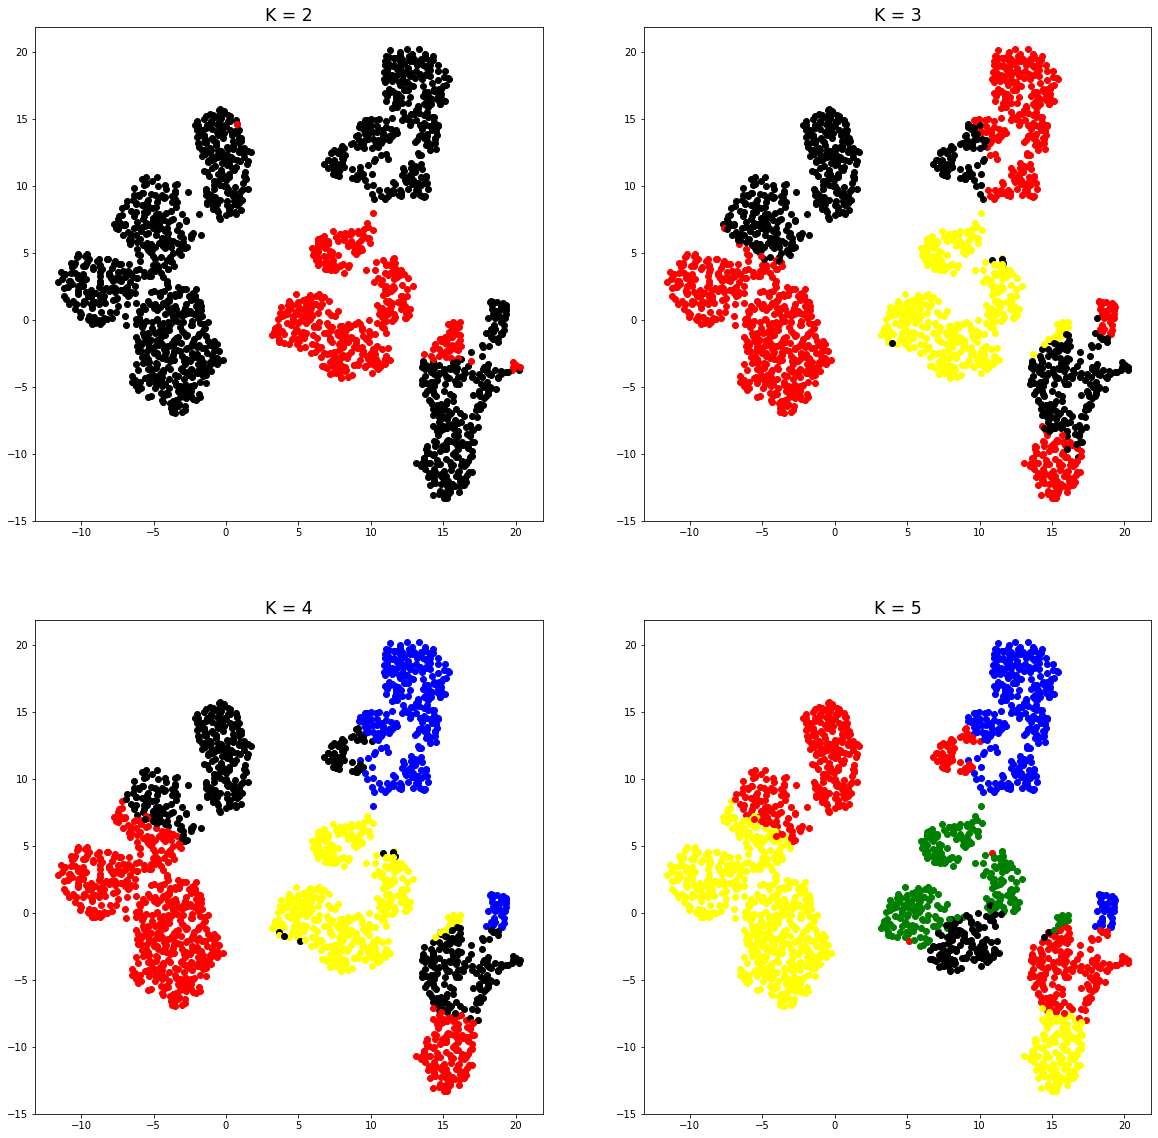

In [47]:
# Define a list of colors to use
colors = ['black', 'red', 'yellow', 'blue', 'green']

# Create a plot for each value of K
plt.figure(figsize=(20,20))
for k in [2,3,4,5]:
    estimator = KMeans(n_clusters = k ,random_state=seed)
    res = estimator.fit_predict(X)
    
       
    plt.subplot(2,2,k-1)
    plt.title('K = {}'.format(k), size='xx-large')
    for i in range(pca_components.shape[0]):
        plt.scatter(umap_results[i, 0], umap_results[i, 1], color=colors[int(res[i])])

In [54]:
y = df['electric']

for k in [2,3]:
    # Defining the agglomerative clustering
    estimator = KMeans(n_clusters = k ,random_state=seed)
    
    
    # Fit model
    res = estimator.fit_predict(X)
    
    sil = metrics.silhouette_score(X, res, metric='euclidean')
    ari = metrics.adjusted_rand_score(y, res)
    
    print(f'For K = {k}', '\n', '--' *20)
    print(f'Adjusted Rand Index: {ari}', '\n')
    print(f'Silhouette Score: {sil}', '\n'*3)

For K = 2 
 ----------------------------------------
Adjusted Rand Index: 0.8874176848246268 

Silhouette Score: 0.47041690845111855 



For K = 3 
 ----------------------------------------
Adjusted Rand Index: 0.4171193839216757 

Silhouette Score: 0.311486674858506 





K-Means so far appears to be identifying only the difference between a class that we already know. In this case it has not provided any meaningful insights yet. Perhaps another method would yield better results.

### Hierarchical Clustering

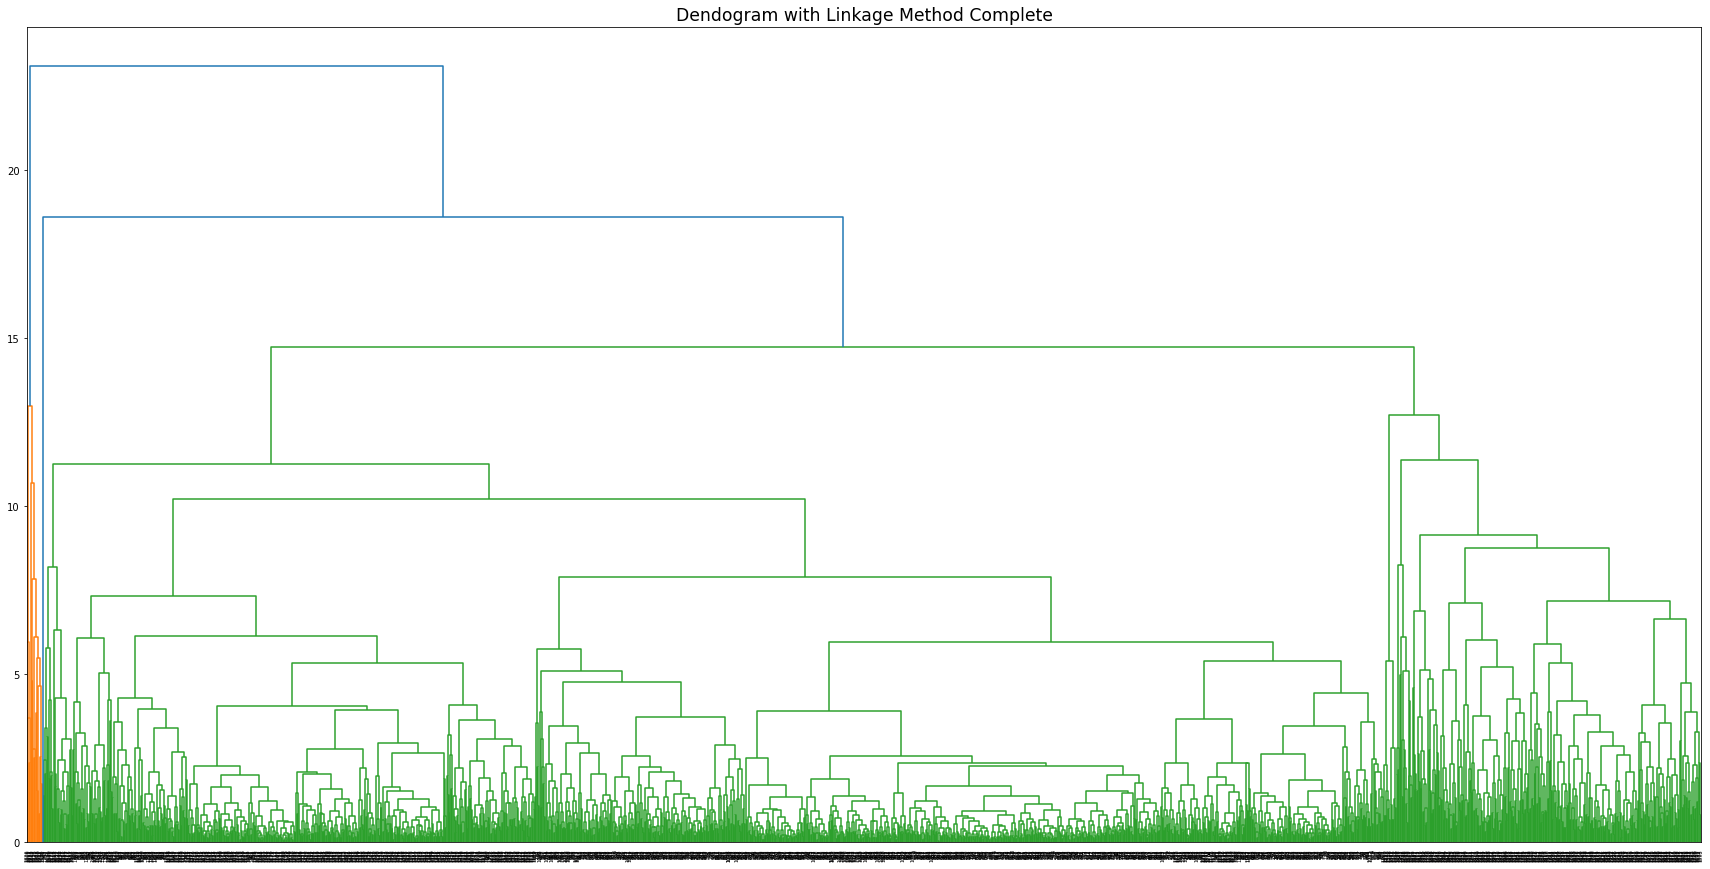

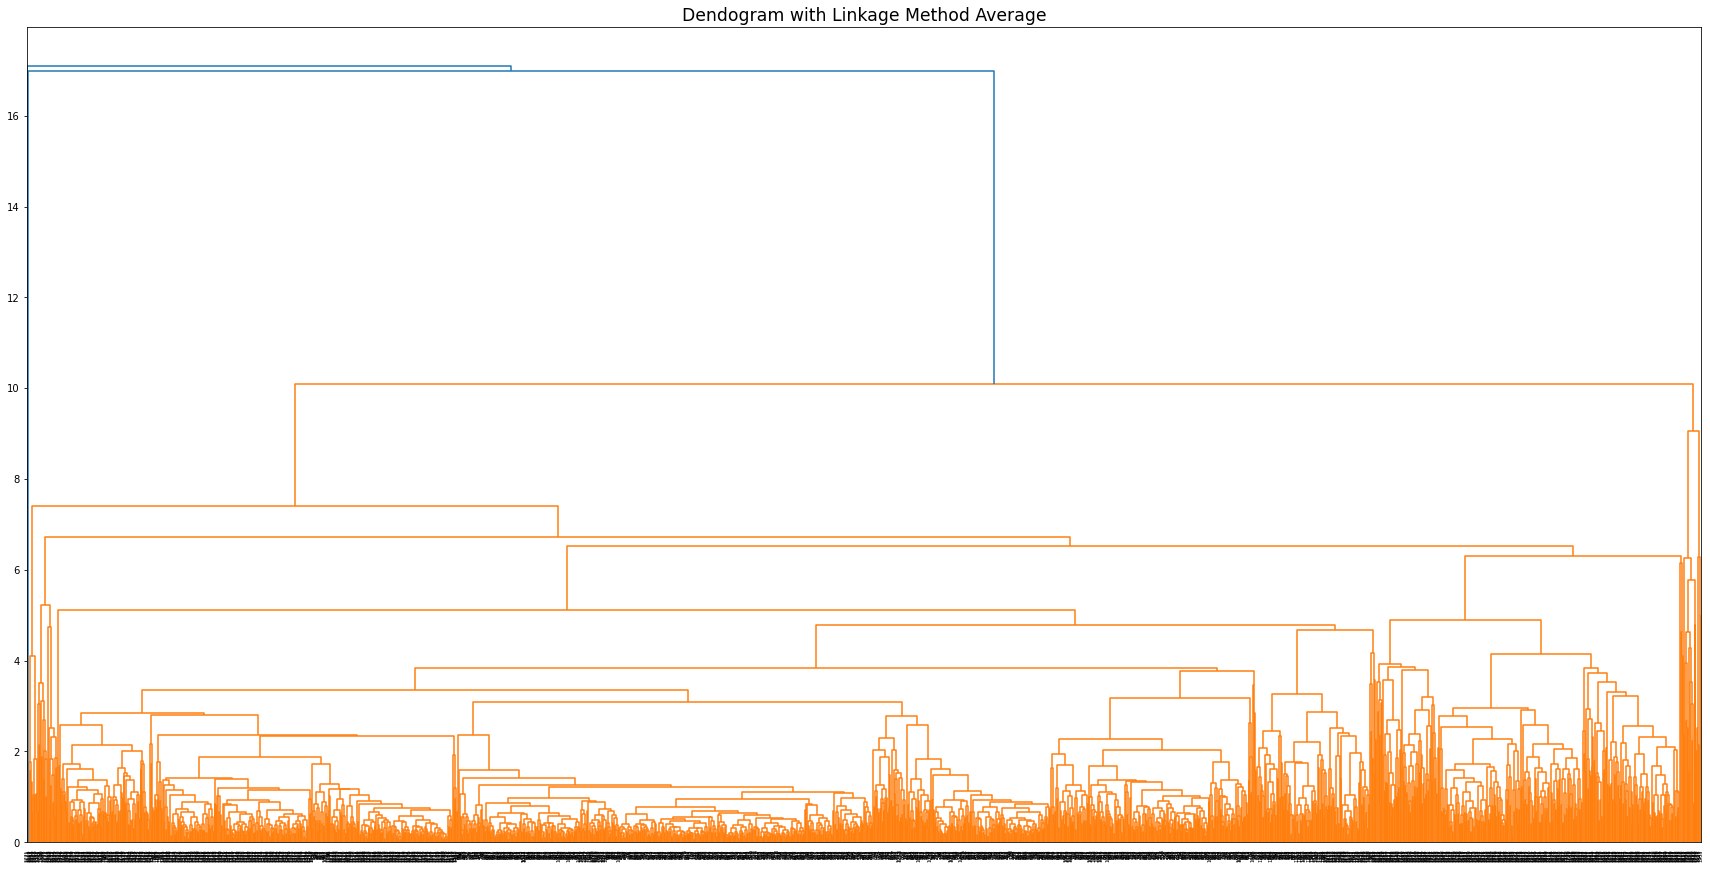

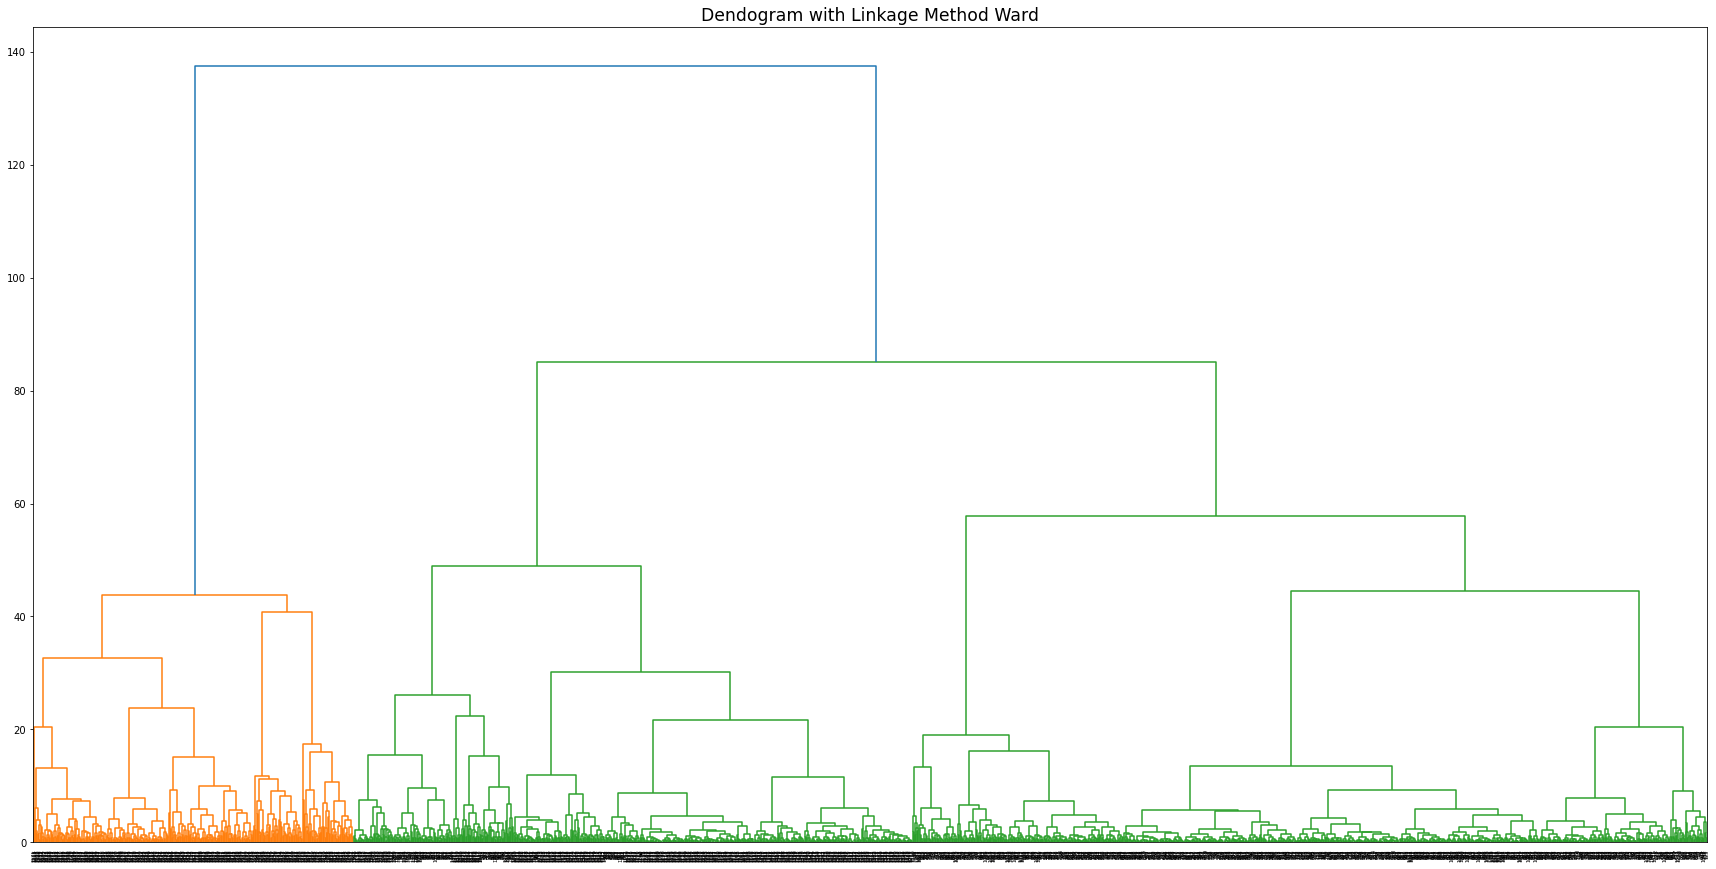

In [48]:
linkages = ['complete', 'average', 'ward']

for method in linkages:
    plt.figure(figsize=(30,15))
    plt.title('Dendogram with Linkage Method {}'.format(method.capitalize())
              , size='xx-large')
    dendrogram(linkage(X, method=method))
    plt.show()

The Ward linkage method appears to be the only one that produces meaningful clusters.

In [55]:
for k in [2, 3, 4]:
    # Defining the agglomerative clustering
    estimator = agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=k)
    
    
    # Fit model
    res = estimator.fit_predict(X)
    
    sil = metrics.silhouette_score(X, res, metric='euclidean')
    ari = metrics.adjusted_rand_score(y, res)
    
    print(f'For K = {k}', '\n', '--' *20)
    print(f'Adjusted Rand Index: {ari}', '\n')
    print(f'Silhouette Score: {sil}', '\n'*3)



For K = 2 
 ----------------------------------------
Adjusted Rand Index: 0.9329023220419816 

Silhouette Score: 0.4612176271911817 



For K = 3 
 ----------------------------------------
Adjusted Rand Index: 0.4115866141316243 

Silhouette Score: 0.30026753142064394 



For K = 4 
 ----------------------------------------
Adjusted Rand Index: 0.29017468245347167 

Silhouette Score: 0.30758550326201267 





The ARI and silhouette score for k = 2 is still best. However I will visualize a 4 cluster solution on the UMAP low dimensional space. Do the 4 clusters identifiable in the dendogram reflect the same groupings in the UMAP projection?

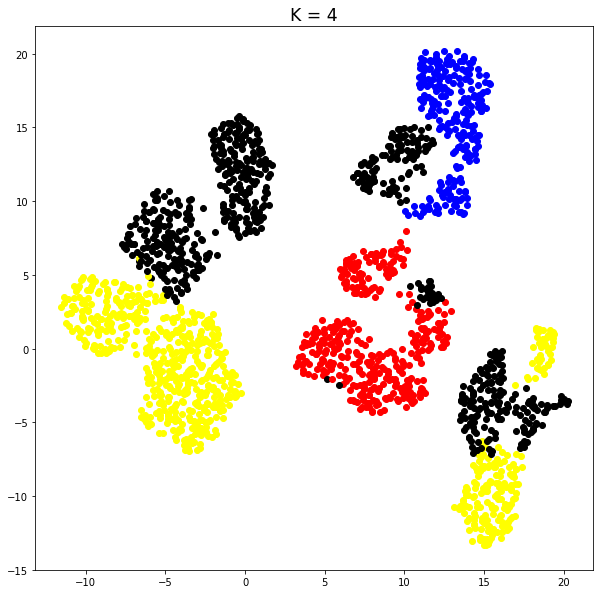

In [76]:
estimator = agg_cluster = AgglomerativeClustering(linkage='ward', 
                                      affinity='euclidean',
                                      n_clusters=4)
    

# Fit model
res = estimator.fit_predict(X)



# Plot
plt.figure(figsize=(10,10))
plt.title('K = 4', size='xx-large')
for i in range(pca_components.shape[0]):
    plt.scatter(umap_results[i, 0], umap_results[i, 1], color=colors[res[i]])


### DBSCAN

In [64]:
samples = np.arange(1,25)
out = []

for sample in samples:
    # Defining the algorithm
    dbscan_cluster = DBSCAN(eps=1, min_samples=sample, metric='euclidean')

    # Fit model
    pred = dbscan_cluster.fit_predict(X)


    #clusters = pred

    #print(f'For {sample} samples:', '\n', '-'*20)
    #print(f'Silhouette Score: {sil}', '\n')
    #print(f'Adjusted Rand Index Score: {ari}', '\n')
    


    clusters = len(np.unique(pred))
    out.append([f'{sample}', f'{clusters}'])

                
                
# input the results into a DataFrame                
out = pd.DataFrame(out, columns = [['Number of Samples', 'Number of Clusters']])

# return the results                
out

,Number of Samples,Number of Clusters
0,1,233
1,2,47
2,3,27
3,4,21
4,5,18
5,6,14
6,7,14
7,8,13
8,9,9
9,10,9


In [70]:
out = []

for eps in np.arange(1, 25):
    # Defining the algorithm
    dbscan_cluster = DBSCAN(eps=eps, min_samples=1, metric='euclidean')

    # Fit model
    pred = dbscan_cluster.fit_predict(X)


    #clusters = pred

    #print(f'For {sample} samples:', '\n', '-'*20)
    #print(f'Silhouette Score: {sil}', '\n')
    #print(f'Adjusted Rand Index Score: {ari}', '\n')
    


    clusters = len(np.unique(pred))
    out.append([f'{eps}', f'{clusters}'])

                
                
# input the results into a DataFrame                
out = pd.DataFrame(out, columns = [['Value of Epsilon', 'Number of Clusters']])

# return the results                
out

,Value of Epsilon,Number of Clusters
0,1,233
1,2,42
2,3,12
3,4,7
4,5,3
5,6,2
6,7,2
7,8,2
8,9,2
9,10,1


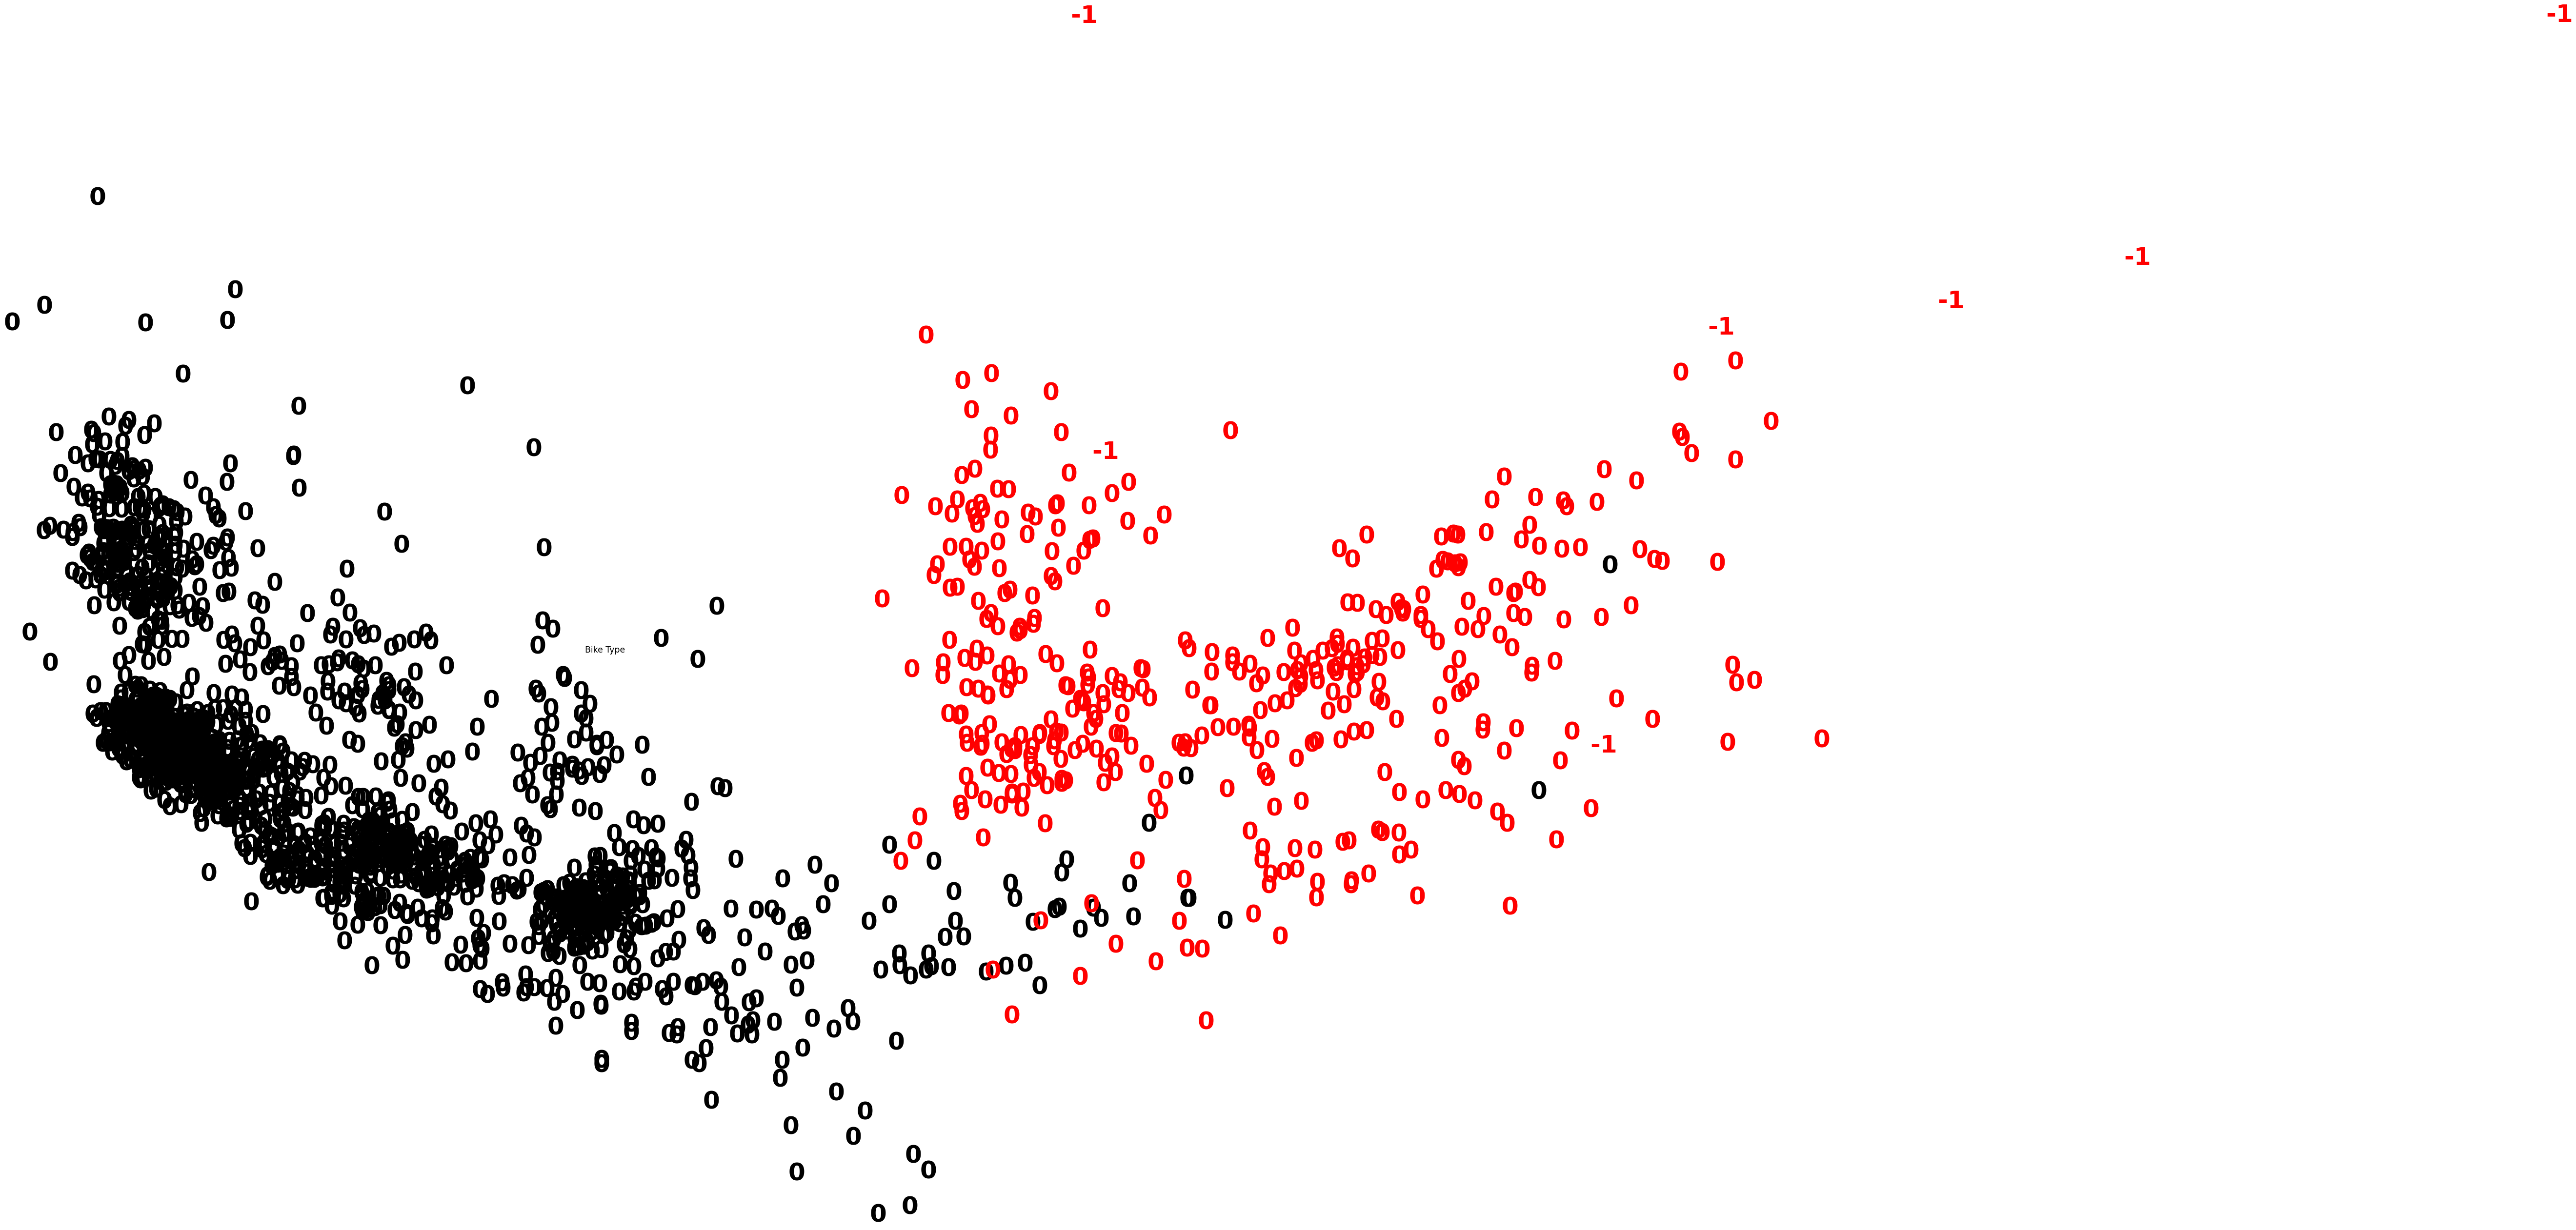

In [72]:
dbscan_cluster = DBSCAN(eps=4, min_samples=20, metric='euclidean')

# Fit model
res = dbscan_cluster.fit_predict(X)

# Draw the legend for bike type
legend_elements = [mlines.Line2D([0], [0], marker='o', color='w', label='Standard',
                          markerfacecolor='black', markersize=10)
                   ,mlines.Line2D([0], [0], marker='o', color='w', label='Electric',
                          markerfacecolor='red', markersize=10)]


# Plot the PCA components colored by bike type
#plt.figure(figsize=(8,8))
plt.title('Bike Type', size='xx-large')
for i in range(pca_components.shape[0]):
    plt.text(pca_components[i, 0], pca_components[i, 1], res[i]
             , color=colors[int(y[i])]
            , fontdict={'weight': 'bold', 'size': 50})

    
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

### Conclusion

K-Means and Hierarchical clustering offered the best performance but no particularly new insignts. 

PCA dimension reduction most closely reflects the ground truths we already have. UMAP showed that there are several clusters in low dimensional space. However so far only two of those clusters have labels and none of the clustering algorithms identified those clusters.

The results of the UMAP projection indicate that there may be currently un-known labels within the dataset that warrant further examination.